## Final Project Submission

Please fill out:
* Student name: Naomi Chesang Rotich
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [23]:
# Your code here - remember to use markdown cells for comments as well!

In [24]:
#libraries 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
# importing data
basics_df = pd.read_csv("title.basics.csv", index_col = 0)
basics_df.head()

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [26]:
gross_df = pd.read_csv('bom.movie_gross.csv')
gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [27]:
ratings_df = pd.read_csv('title.ratings.csv')
ratings_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [28]:
# Join the title.ratings.csv and title.basics.csv datasets on the "tconst" column
ratings_basics_df = pd.merge(ratings_df, basics_df, on='tconst')
ratings_basics_df.head()

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"


In [29]:
# Join the resulting dataset with the bom.movie_gross.csv dataset on the "title" column
df = pd.merge(ratings_basics_df, gross_df, left_on='primary_title', right_on='title')
df.head()

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,title,studio,domestic_gross,foreign_gross,year
0,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",The Legend of Hercules,LG/S,18800000.0,42400000,2014
1,tt1171222,5.1,8296,Baggage Claim,Baggage Claim,2013,96.0,Comedy,Baggage Claim,FoxS,21600000.0,887000,2013
2,tt1181840,7.0,5494,Jack and the Cuckoo-Clock Heart,Jack et la mécanique du coeur,2013,94.0,"Adventure,Animation,Drama",Jack and the Cuckoo-Clock Heart,Shout!,NaN,3400000,2014
3,tt1210166,7.6,326657,Moneyball,Moneyball,2011,133.0,"Biography,Drama,Sport",Moneyball,Sony,75600000.0,34600000,2011
4,tt1212419,6.5,87288,Hereafter,Hereafter,2010,129.0,"Drama,Fantasy,Romance",Hereafter,WB,32700000.0,72500000,2010


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3027 entries, 0 to 3026
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           3027 non-null   object 
 1   averagerating    3027 non-null   float64
 2   numvotes         3027 non-null   int64  
 3   primary_title    3027 non-null   object 
 4   original_title   3027 non-null   object 
 5   start_year       3027 non-null   int64  
 6   runtime_minutes  2980 non-null   float64
 7   genres           3020 non-null   object 
 8   title            3027 non-null   object 
 9   studio           3024 non-null   object 
 10  domestic_gross   3005 non-null   float64
 11  foreign_gross    1832 non-null   object 
 12  year             3027 non-null   int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 331.1+ KB


# Preprocess of data
This includes cleaning, scrubbing, handling missing values. 
## Duplicated columns
From the resulting table, we have three columns containing title names and year, having all of them would not be of help, hence dropping original_title and title is a good idea.


In [31]:
# dropping the original_title and title columns
df.drop(columns = ['original_title', 'title','year','tconst'], axis = 1, inplace = True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3027 entries, 0 to 3026
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   averagerating    3027 non-null   float64
 1   numvotes         3027 non-null   int64  
 2   primary_title    3027 non-null   object 
 3   start_year       3027 non-null   int64  
 4   runtime_minutes  2980 non-null   float64
 5   genres           3020 non-null   object 
 6   studio           3024 non-null   object 
 7   domestic_gross   3005 non-null   float64
 8   foreign_gross    1832 non-null   object 
dtypes: float64(3), int64(2), object(4)
memory usage: 236.5+ KB


## Missing values
For the null values, we can either drop them or impute them with mean, median, or using special identifiers. This depends with on the nature of data.

In [33]:
# checking for missing values
df.isna().sum()

averagerating         0
numvotes              0
primary_title         0
start_year            0
runtime_minutes      47
genres                7
studio                3
domestic_gross       22
foreign_gross      1195
dtype: int64

In [34]:
def missing_values(data):
     # identify the total missing values per column
    miss = data.isnull().sum().sort_values(ascending = False)
     # calculate percentage of the missing values
    percentage_miss = (data.isnull().sum() / len(data)).sort_values(ascending = False)
    # store in a dataframe 
    missing = pd.DataFrame({"Missing Values": miss, "Percentage(%)": percentage_miss})

    # remove values that are missing 
    missing.drop(missing[missing["Percentage(%)"] == 0].index, inplace = True)

    return missing


missing_data = missing_values(df)
missing_data


,Missing Values,Percentage(%)
foreign_gross,1195,0.394780
runtime_minutes,47,0.015527
domestic_gross,22,0.007268
genres,7,0.002313
studio,3,0.000991


From the output, variable genre, studio, and runtime in minutes has negligible missing values and dropping them would not affect the performance of our model. Filling the missing values will not be the best option since each movie has a inique title and runtimes. For the domestic and foreign gross columns, they are dependant on the type of studio, such that movies on a prticular studio has high gross revenue generated both domestically and outside compared to the others. For this reason, dropping the missing values will be rightful to avoid over estimate or under estimate the revenue generated by certain studios which might bring bias in our analysis. 


In [35]:
#dropping rows with null values
df.dropna(axis=0, inplace=True)

In [36]:
df.isna().sum()

averagerating      0
numvotes           0
primary_title      0
start_year         0
runtime_minutes    0
genres             0
studio             0
domestic_gross     0
foreign_gross      0
dtype: int64

In [37]:
# foreign_gross is of datatype object instead of float
# foreign_gross to float
df["foreign_gross"] = df["foreign_gross"].str.replace(',' ,'').astype(float)
df["foreign_gross"].head()

0     42400000.0
1       887000.0
3     34600000.0
4     72500000.0
5    485300000.0
Name: foreign_gross, dtype: float64

In [38]:
df.head()

,averagerating,numvotes,primary_title,start_year,runtime_minutes,genres,studio,domestic_gross,foreign_gross
0,4.2,50352,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",LG/S,18800000.0,42400000.0
1,5.1,8296,Baggage Claim,2013,96.0,Comedy,FoxS,21600000.0,887000.0
3,7.6,326657,Moneyball,2011,133.0,"Biography,Drama,Sport",Sony,75600000.0,34600000.0
4,6.5,87288,Hereafter,2010,129.0,"Drama,Fantasy,Romance",WB,32700000.0,72500000.0
5,7.4,428142,Mission: Impossible - Ghost Protocol,2011,132.0,"Action,Adventure,Thriller",Par.,209400000.0,485300000.0


In [39]:
df['genre']=df['genres'].str.split(",", expand= True)[0]
df['genre'][0]

'Action'

In [40]:
df.head()

,averagerating,numvotes,primary_title,start_year,runtime_minutes,genres,studio,domestic_gross,foreign_gross,genre
0,4.2,50352,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",LG/S,18800000.0,42400000.0,Action
1,5.1,8296,Baggage Claim,2013,96.0,Comedy,FoxS,21600000.0,887000.0,Comedy
3,7.6,326657,Moneyball,2011,133.0,"Biography,Drama,Sport",Sony,75600000.0,34600000.0,Biography
4,6.5,87288,Hereafter,2010,129.0,"Drama,Fantasy,Romance",WB,32700000.0,72500000.0,Drama
5,7.4,428142,Mission: Impossible - Ghost Protocol,2011,132.0,"Action,Adventure,Thriller",Par.,209400000.0,485300000.0,Action


In [41]:
df.drop(columns = ['genres'], axis=1, inplace = True)

In [42]:
df.head()

,averagerating,numvotes,primary_title,start_year,runtime_minutes,studio,domestic_gross,foreign_gross,genre
0,4.2,50352,The Legend of Hercules,2014,99.0,LG/S,18800000.0,42400000.0,Action
1,5.1,8296,Baggage Claim,2013,96.0,FoxS,21600000.0,887000.0,Comedy
3,7.6,326657,Moneyball,2011,133.0,Sony,75600000.0,34600000.0,Biography
4,6.5,87288,Hereafter,2010,129.0,WB,32700000.0,72500000.0,Drama
5,7.4,428142,Mission: Impossible - Ghost Protocol,2011,132.0,Par.,209400000.0,485300000.0,Action


In [43]:
df['genre'].value_counts(ascending=False)

Action         458
Drama          360
Comedy         359
Adventure      173
Biography      138
Crime           80
Horror          76
Documentary     65
Animation       22
Thriller        11
Fantasy          9
Mystery          7
Romance          4
Family           3
Music            1
Sci-Fi           1
Name: genre, dtype: int64

In [44]:
grouped = df.groupby('averagerating').sum()
grouped

,numvotes,start_year,runtime_minutes,domestic_gross,foreign_gross
averagerating,,,,,
1.6,74978,2011,105.0,73000000.0,26000000.0
1.7,70,2013,112.0,23600000.0,5800000.0
2.1,647,2013,132.0,800.0,1100000.0
2.5,5538,2011,140.0,151000.0,58200000.0
2.6,10193,6046,308.0,204700000.0,394800000.0
...,...,...,...,...,...
8.5,1411651,8062,585.0,704578000.0,326470069.5
8.6,1354698,6036,320.0,195300000.0,500300000.0
8.7,1364,4024,302.0,783300.0,565000.0


In [45]:
df['']

KeyError: ''

In [ ]:
most_performing_genre = grouped['numvotes'].idxmax()
most_performing_genre

In [ ]:
sns.barplot(data=df, x="genre", y="numvotes")
plt.xticks(rotation=60);

In [ ]:
sns.barplot(data=df, x='genre', y='averagerating')
plt.xticks(rotation=60);

In [ ]:
sns.scatterplot(x='averagerating', y='domestic_gross', data=df)
plt.show();

In [ ]:
# Plot a box plot to visualize the distribution of runtime
sns.boxplot(x='runtime_minutes', data=df)
plt.show()

In [ ]:
sns.scatterplot(x='runtime_minutes', y='averagerating', data=df)
plt.show();

In [ ]:
df['runtime_minutes'].corr(df['numvotes'])

In [ ]:
cols = ['start_year', 'runtime_minutes', 'averagerating', 'numvotes', 'domestic_gross', 'foreign_gross']
plt.figure(dpi=140)
sns.pairplot(df[cols])
plt.show()

In [ ]:
df[cols].corr

In [ ]:
# Plot a line plot to visualize the trend of revenue over the start year
sns.lineplot(x='start_year', y='domestic_gross', data=df)
plt.show()

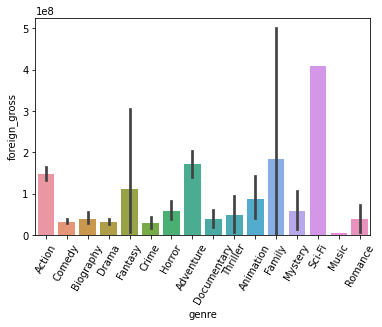

In [43]:
# barplot for genre with foreign_gross to see the 
sns.barplot(x='genre', y='foreign_gross', data=df)
plt.xticks(rotation=60)
plt.show()

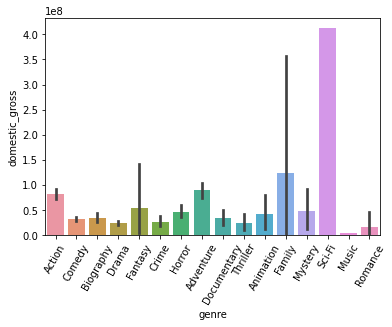

In [44]:
# barplot for genre with domestic_gross to see the 
sns.barplot(x='genre', y='domestic_gross', data=df)
plt.xticks(rotation=60)
plt.show()

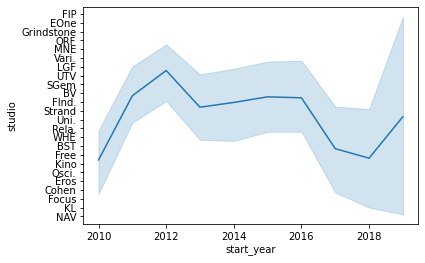

In [48]:
df.groupby('studio')['start_year']
sns.lineplot(x='start_year', y='studio', data=df)
plt.show()

In [49]:
documentary_df= df[df['genre']== 'Documentary']
documentary_df.head()

,tconst,averagerating,numvotes,primary_title,start_year,runtime_minutes,studio,domestic_gross,foreign_gross,genre
72,tt1596753,6.7,2314,Salinger,2013,120.0,Wein.,584000.0,67000.0,Documentary
98,tt5324464,6.2,6,Nerve,2015,62.0,LGF,38600000.0,46700000.0,Documentary
106,tt1152822,6.4,6466,Freakonomics,2010,93.0,Magn.,101000.0,16400.0,Documentary
123,tt1628042,6.5,104,Gone,2011,85.0,LG/S,11700000.0,6400000.0,Documentary
178,tt1692325,8.7,17,Eyes Wide Open,2010,110.0,NAV,26300.0,250000.0,Documentary


In [53]:
sns.lineplot(x=documentary_df, y='start_year', data=df)
plt.xticks(rotation=60)
plt.show()

ValueError: Length of DataFrame vectors must match length of `data` when both are used, but `data` has length 1767 and the vector passed to `x` has length 65.

## Exploratory data Analysis
This includes visualizations on statistics, distributions and relationships within the data.
## Goals
1. conduct EDA on the dataset
2. visualize the data



In [42]:
#overal statistics the dataset

df.describe()

,averagerating,numvotes,start_year,runtime_minutes,domestic_gross,foreign_gross
count,1767.000000,1.767000e+03,1767.000000,1767.000000,1.767000e+03,1.767000e+03
mean,6.459706,9.692010e+04,2013.559706,107.895869,5.008103e+07,7.959582e+07
std,0.991033,1.539057e+05,2.621180,20.105904,8.101089e+07,1.403646e+08
min,1.600000,5.000000e+00,2010.000000,3.000000,4.000000e+02,6.000000e+02
25%,5.900000,6.392500e+03,2011.000000,95.000000,1.300000e+06,4.900000e+06
50%,6.500000,3.987000e+04,2013.000000,106.000000,2.110000e+07,2.150000e+07
75%,7.100000,1.171330e+05,2016.000000,119.000000,6.120000e+07,8.195000e+07
max,9.200000,1.841066e+06,2019.000000,272.000000,7.001000e+08,9.464000e+08


It is interesting that there is a difference between the mean and the median value of runtime_minutes, numvotes, domestic_gross and froreign_gross. Both of these statistics are supposed to give an idea of the "typical" value for the column, so why is there difference of one between them? to answer this question we need how the runtime in minites are distributed in our dataset. we'll look at it in two ways, by a histogram and a boxplot.


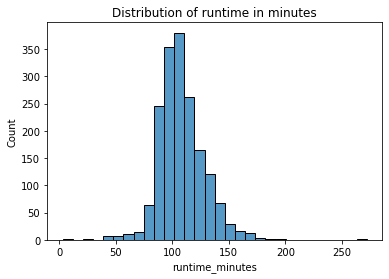

In [45]:
ax=sns.histplot(data=df, x="runtime_minutes", bins=30)
ax.set_title('Distribution of runtime in minutes');

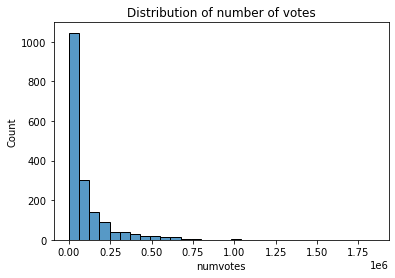

In [46]:
ax=sns.histplot(data=df, x="numvotes", bins=30)
ax.set_title('Distribution of number of votes');

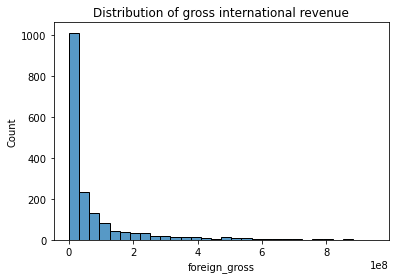

In [50]:
ax=sns.histplot(data=df, x=("foreign_gross"), bins=30)
ax.set_title('Distribution of gross international revenue');

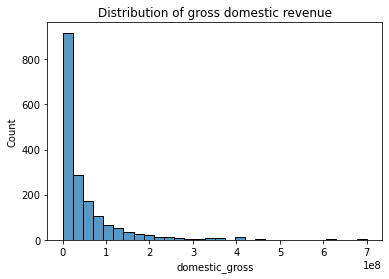

In [51]:
ax=sns.histplot(data=df, x="domestic_gross", bins=30)
ax.set_title('Distribution of gross domestic revenue');

The above plots violates the normal distribution, and this explains the difference in their mean and median values.

C:\Users\NAOMI\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\NAOMI\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\NAOMI\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  w

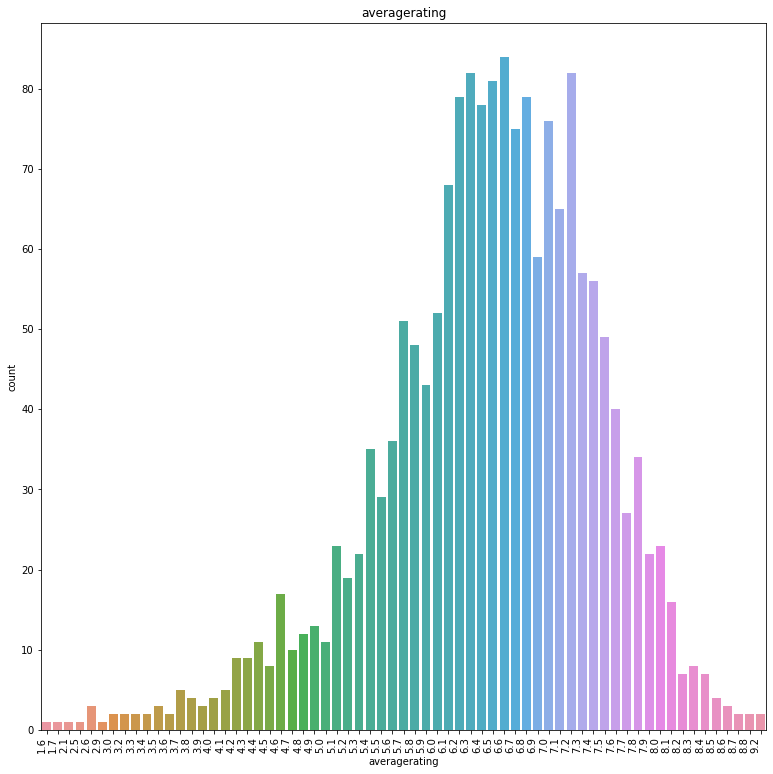

In [54]:
sns.countplot(df['averagerating'])
sns.countplot(df['averagerating']).set_xticklabels(sns.countplot(df['averagerating']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(13,13)
plt.title('averagerating');

<AxesSubplot:xlabel='studio', ylabel='foreign_gross'>

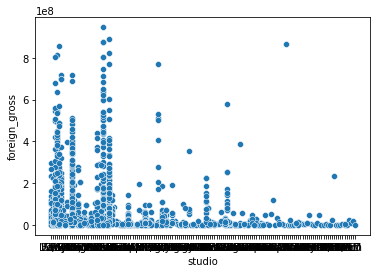

In [60]:
sns.scatterplot(data=df, x="studio", y="foreign_gross")

In [ ]:
sns.countplot(df['averagerating'])
sns.countplot(df['averagerating']).set_xticklabels(sns.countplot(df['averagerating']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(13,13)
plt.title('averagerating');